# Stock Price Prediction

**Importation des Bibliothèques**

In [2]:
import yfinance as yf
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd


**Collecte des données avec Yahoo Finance**

In [3]:
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-03-03,4.641116,4.659480,4.574110,4.619277,305484756
2005-03-04,4.613568,4.647071,4.592970,4.633422,271979640
2005-03-07,4.685786,4.705393,4.641612,4.660225,347995502
2005-03-08,4.596196,4.711597,4.590488,4.692984,323050350
2005-03-09,4.500648,4.582546,4.471116,4.571627,456119263


In [5]:
google_data.shape

(5032, 5)

In [6]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,50.046152,50.554844,49.525779,50.027526,1.048441e+08
std,47.989297,48.496339,47.487542,47.966244,1.349206e+08
min,4.342810,4.427436,4.282751,4.350503,1.584340e+05
25%,13.460749,13.587504,13.325803,13.485070,2.627200e+07
50%,28.515523,28.739464,28.241211,28.556958,4.897844e+07
75%,67.246376,67.851471,66.851297,67.260824,1.288321e+08
max,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-03-03 to 2025-03-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5032 non-null   float64
 1   (High, GOOG)    5032 non-null   float64
 2   (Low, GOOG)     5032 non-null   float64
 3   (Open, GOOG)    5032 non-null   float64
 4   (Volume, GOOG)  5032 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [8]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

**Visualisation des prix**

Text(0.5, 1.0, 'Closing price of Google data')

<Figure size 1500x500 with 0 Axes>

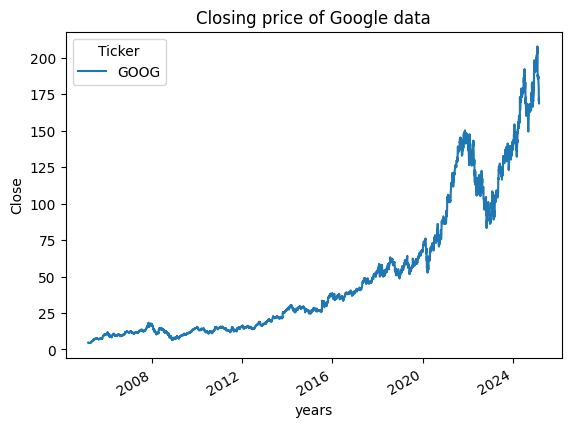

In [9]:
plt.figure(figsize = (15,5))
google_data['Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of Google data")

In [10]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [11]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

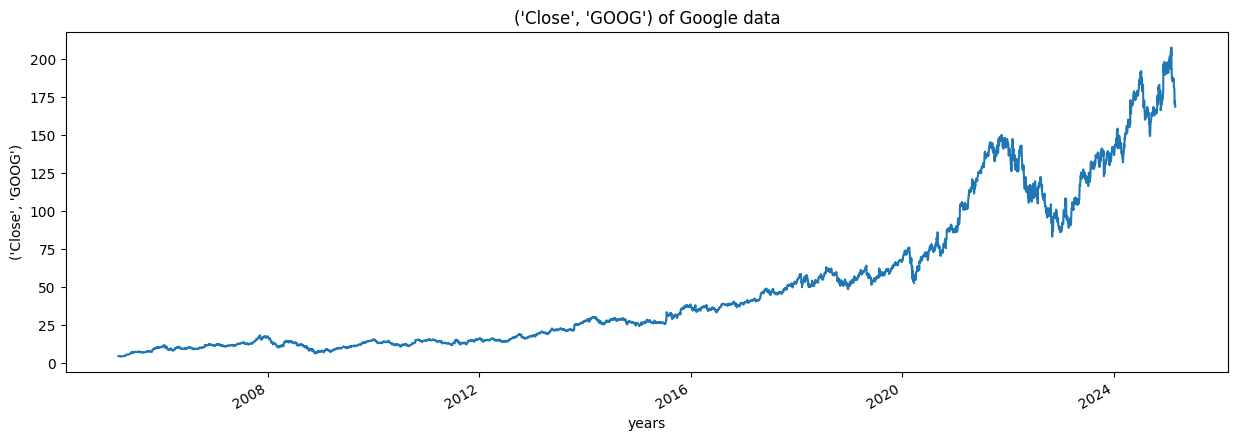

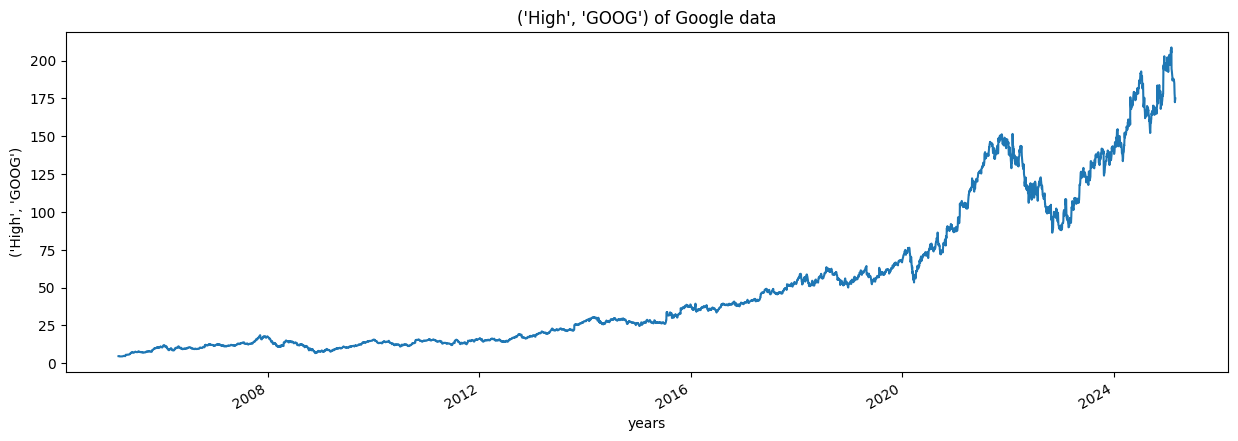

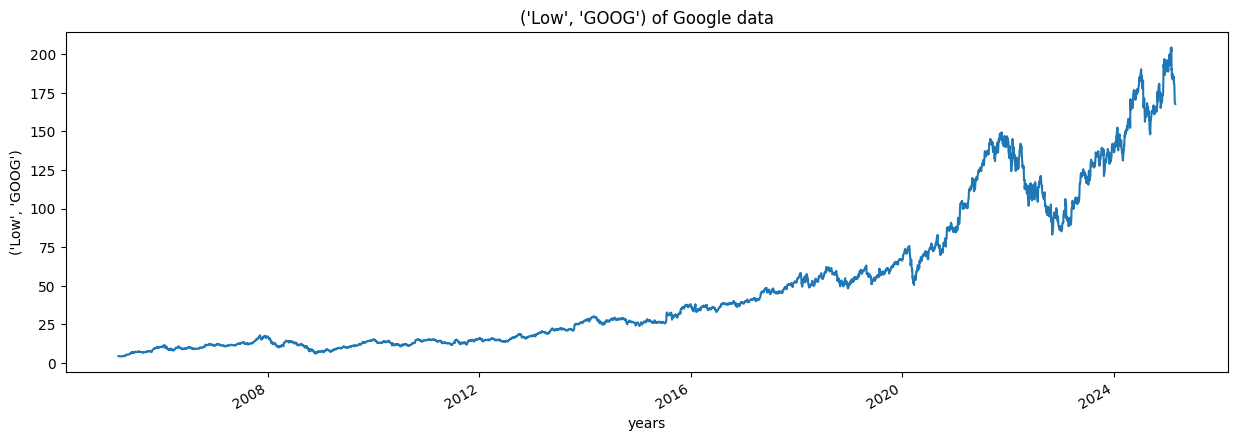

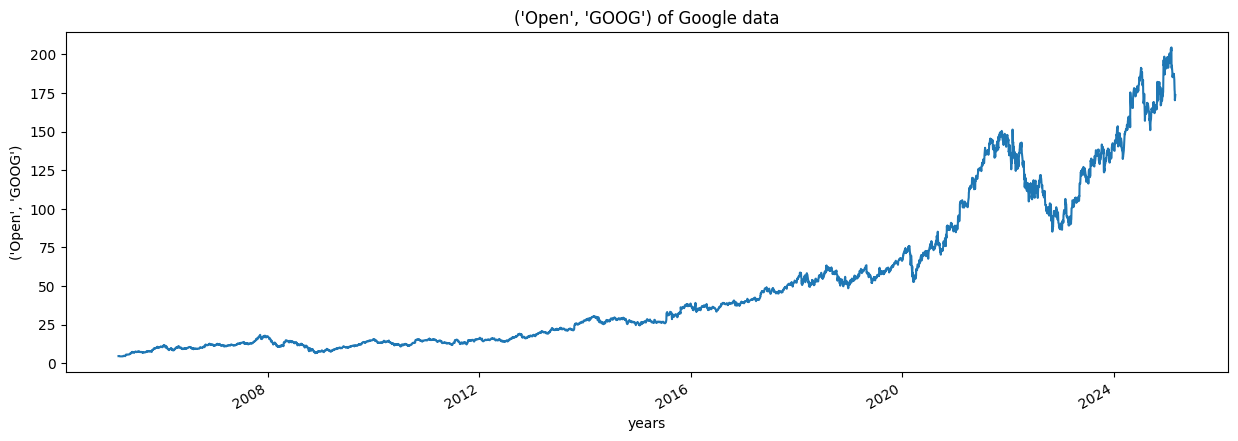

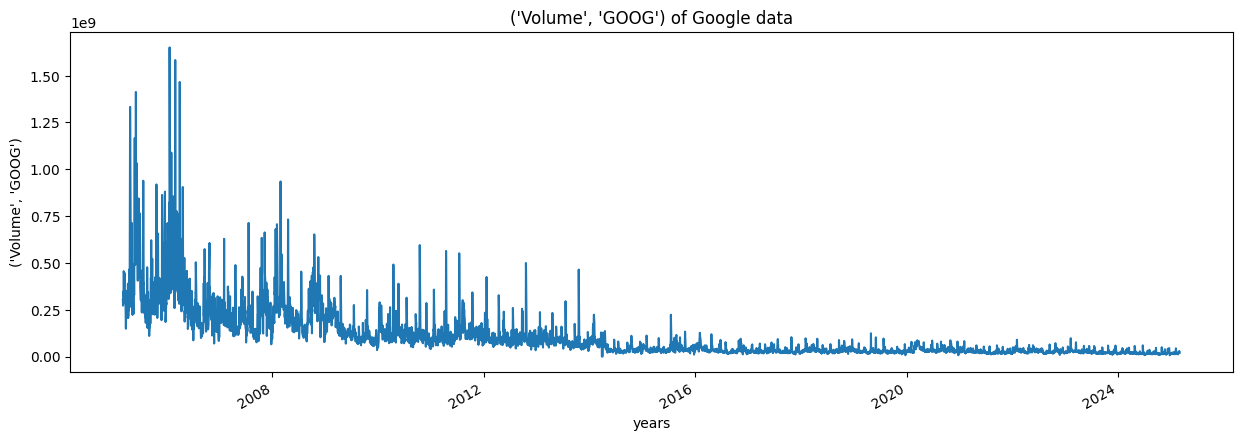

In [12]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

#### **Préparation des Données pour LSTM**

 **Normalisation des Données**

In [13]:
close_price = google_data[['Close']]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)


**Créer des séquences de 100 jours (x_data) et Stocke' la valeur suivante (y_data).**

In [14]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

x_data, y_data = np.array(x_data), np.array(y_data)


In [15]:
x_data[0],y_data[0]

(array([[1.46683434e-03],
        [1.33137574e-03],
        [1.68648914e-03],
        [1.24595325e-03],
        [7.76127240e-04],
        [6.08942363e-04],
        [3.42911534e-04],
        [0.00000000e+00],
        [4.41759830e-04],
        [7.44398621e-05],
        [5.24739127e-04],
        [6.16262549e-04],
        [7.18775627e-04],
        [4.40540581e-04],
        [4.86909572e-04],
        [5.19859785e-04],
        [7.84669020e-04],
        [5.58908590e-04],
        [6.66298666e-04],
        [6.73616507e-04],
        [6.16262549e-04],
        [1.25693822e-03],
        [1.65720606e-03],
        [1.73652526e-03],
        [2.29055217e-03],
        [2.08187764e-03],
        [2.22587802e-03],
        [2.31496060e-03],
        [2.18926772e-03],
        [2.00865703e-03],
        [1.22154716e-03],
        [1.46195031e-03],
        [2.00255844e-03],
        [2.82017767e-03],
        [3.56701948e-03],
        [4.98137920e-03],
        [5.92347207e-03],
        [5.34015270e-03],
        [5.4

**Division des Données en Entraînement et Test**

In [16]:
splitting_len = int(len(x_data) * 0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]
x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3452, 100, 1)
(3452, 1)
(1480, 100, 1)
(1480, 1)


**Création du Modèle LSTM**

In [37]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))#Couche dense intermédiaire
model.add(Dense(1))#Sortie unique (prix prédit)

c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compilation et Entraînement du Modèle**

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

3452/3452 ━━━━━━━━━━━━━━━━━━━━ 119s 33ms/step - loss: 1.8331e-04


In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

**Prédiction et Inversion de la Normalisation**

In [40]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)


47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step


**Visualisation des Résultats**

In [41]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-04-12,60.675488,60.922268
2019-04-15,60.836411,61.077702
2019-04-16,61.136826,61.282463
2019-04-17,61.595680,61.522392
2019-04-18,61.597176,61.816669


<Figure size 640x480 with 0 Axes>

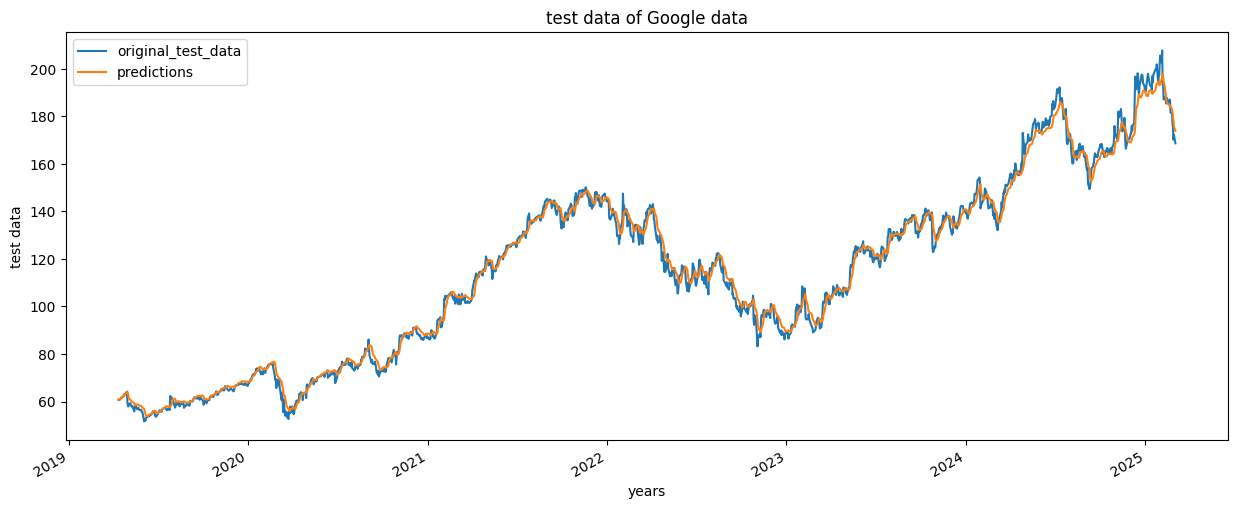

In [42]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

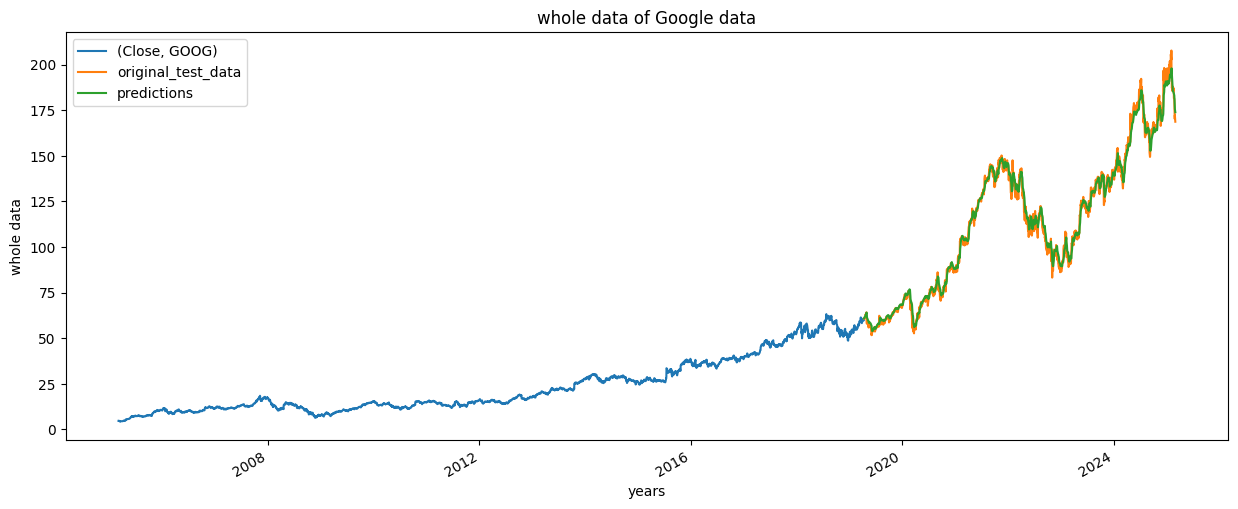

In [43]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

**Calcul des métriques**

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calcul des métriques
mse = mean_squared_error(inv_y_test, inv_predictions)  # MSE
mae = mean_absolute_error(inv_y_test, inv_predictions)  # MAE
rmse = np.sqrt(mse)  # RMSE
r2 = r2_score(inv_y_test, inv_predictions)  # R²

# Calcul de R² ajusté
n = len(inv_y_test)  # Nombre d'observations
p = 1  # Nombre de prédicteurs (ici, un seul prédicteur : le prix de clôture précédent)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Affichage des résultats
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"R² Ajusté: {r2_adjusted:.4f}")


MSE: 11.4542
MAE: 2.4774
RMSE: 3.3844
R²: 0.9922
R² Ajusté: 0.9922


**Sauvegarde du Modèle**

 (Bonne pratique pour réutiliser le modèle sans le réentraîner)

In [45]:
model.save("Latest_stock_price_model.keras")